# KHUDA 3조 ToyProject

## 주제: 기대 수명 분석 및 예측

## 1. 라이브러리 불러오기

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
from google.colab import files

## 2. EDA

In [ ]:
upload = files.upload()

Saving Life Expectancy Data.csv to Life Expectancy Data.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(upload['Life Expectancy Data.csv']))

In [ ]:
df.head()

,Country,Region,Year,Economy_status_Developed,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol_consumption,percentage expenditure,Hepatitis_B,...,Polio,Total expenditure,Income composition of resources,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling
0,Afghanistan,Asia,2000,0,55.8,310.8305,90.5,0.02,10.424960,62,...,24.0,8.20,0.338,24,0.02,148,20.78,2.3,2.5,2.2
1,Afghanistan,Asia,2001,0,56.3,304.8580,87.9,0.02,10.574728,63,...,35.0,7.80,0.340,33,0.02,163,21.61,2.1,2.4,2.2
2,Afghanistan,Asia,2002,0,56.8,298.8855,85.3,0.02,16.887351,64,...,36.0,7.76,0.341,36,0.02,320,22.60,19.9,2.2,2.3
3,Afghanistan,Asia,2003,0,57.3,292.0365,82.7,0.02,11.089053,65,...,41.0,8.82,0.373,41,0.02,332,23.68,19.7,19.9,2.4
4,Afghanistan,Asia,2004,0,57.8,285.1880,80.0,0.02,15.296066,67,...,5.0,8.79,0.381,50,0.02,323,24.73,19.5,19.7,2.5


In [ ]:
df.describe()

,Year,Economy_status_Developed,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol_consumption,percentage expenditure,Hepatitis_B,Measles,BMI,...,Polio,Total expenditure,Income composition of resources,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling
count,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,...,2842.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000
mean,2007.500000,0.207865,68.951053,190.900665,30.083638,4.836912,785.159798,64.646419,2129.247191,37.760779,...,80.935961,5.398230,0.595355,86.343750,0.888279,11596.329003,36.772015,4.855337,4.889747,7.652598
std,4.610582,0.405851,9.344445,113.793213,27.350692,3.985663,2078.005561,39.384860,10410.838983,20.613049,...,25.907617,2.948892,0.252908,15.536902,2.385462,16966.115062,136.862723,4.448052,4.535495,3.168410
min,2000.000000,0.000000,39.400000,49.384000,1.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000
25%,2003.750000,0.000000,62.900000,106.681875,8.100000,1.220000,6.914542,9.000000,0.000000,18.800000,...,76.000000,3.640000,0.466000,81.000000,0.080000,1404.250000,2.070000,1.600000,1.600000,5.100000
50%,2007.500000,0.000000,71.450000,163.277750,19.400000,4.050000,71.850511,86.000000,15.000000,43.100000,...,93.000000,5.480000,0.665500,93.000000,0.150000,4256.500000,7.730000,3.300000,3.300000,7.900000
75%,2011.250000,0.000000,75.500000,245.323375,47.000000,7.810000,470.528518,96.000000,309.000000,56.300000,...,97.000000,7.320000,0.779000,97.000000,0.440000,12706.750000,23.850000,7.200000,7.300000,10.300000
max,2015.000000,1.000000,83.800000,719.360500,138.100000,17.870000,19479.911610,99.000000,212183.000000,79.300000,...,99.000000,17.600000,0.948000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2848 non-null   object 
 1   Region                           2848 non-null   object 
 2   Year                             2848 non-null   int64  
 3   Economy_status_Developed         2848 non-null   int64  
 4   Life_expectancy                  2848 non-null   float64
 5   Adult_mortality                  2848 non-null   float64
 6   Infant_deaths                    2848 non-null   float64
 7   Alcohol_consumption              2848 non-null   float64
 8   percentage expenditure           2848 non-null   float64
 9   Hepatitis_B                      2848 non-null   int64  
 10  Measles                          2848 non-null   int64  
 11  BMI                              2848 non-null   float64
 12  Under_five_deaths   

In [ ]:
df.isna().sum()

Country                            0
Region                             0
Year                               0
Economy_status_Developed           0
Life_expectancy                    0
Adult_mortality                    0
Infant_deaths                      0
Alcohol_consumption                0
percentage expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
Under_five_deaths                  0
Polio                              6
Total expenditure                  0
Income composition of resources    0
Diphtheria                         0
Incidents_HIV                      0
GDP_per_capita                     0
Population_mln                     0
Thinness_ten_nineteen_years        0
Thinness_five_nine_years           0
Schooling                          0
dtype: int64

In [ ]:
df[df.isna().any(axis=1)]

,Country,Region,Year,Economy_status_Developed,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol_consumption,percentage expenditure,Hepatitis_B,...,Polio,Total expenditure,Income composition of resources,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling
1728,Montenegro,Rest of Europe,2000,0,73.2,138.1465,12.5,10.25,274.547260,0,...,NaN,7.32,0.000,91,0.01,4432,0.60,2.6,2.7,10.3
1729,Montenegro,Rest of Europe,2001,0,73.2,138.1465,12.0,10.22,33.669814,0,...,NaN,8.23,0.000,91,0.02,4462,0.61,2.5,2.6,10.3
1730,Montenegro,Rest of Europe,2002,0,73.2,138.1465,11.4,10.24,36.480240,0,...,NaN,8.33,0.000,91,0.02,4529,0.61,2.5,2.5,10.3
1731,Montenegro,Rest of Europe,2003,0,73.3,135.7445,10.6,10.30,495.078296,0,...,NaN,8.91,0.000,91,0.02,4623,0.61,2.4,2.4,10.3
1732,Montenegro,Rest of Europe,2004,0,73.4,133.3415,9.9,10.12,57.121901,0,...,NaN,8.45,0.740,91,0.02,4819,0.61,2.3,2.4,10.4
1733,Montenegro,Rest of Europe,2005,0,74.0,130.9385,9.2,10.30,527.307672,0,...,NaN,8.46,0.746,92,0.03,5013,0.61,2.3,2.3,10.5


In [ ]:
df = df.drop(df.index[1728:1734]).reset_index().drop(['index'], axis=1)

데이터를 불러왔을 때 연관성이 있는 카테고리로 분류를 해서 따로 데이터프레임을 생성하였다. 각각의 데이터프레임끼리의 연관성을 확인하면서 EDA와 전처리를 진행할 예정이다.

## Life Expectancy

<Axes: xlabel='Life_expectancy', ylabel='Count'>

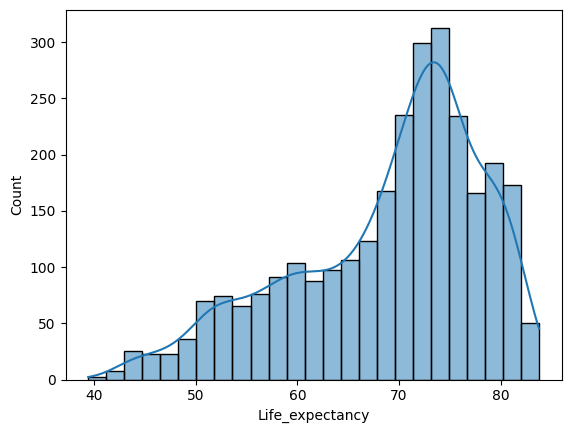

In [ ]:
sns.histplot(data=df['Life_expectancy'], kde=True)

## Lifestyle

In [ ]:
# Smoking, Sleep_time 데이터 구축 필요
columns = ['Life_expectancy', 'Alcohol_consumption', 'BMI']
lifestyle_df = pd.DataFrame(df, columns=columns)
lifestyle_df.head()

,Life_expectancy,Alcohol_consumption,BMI
0,55.8,0.02,12.2
1,56.3,0.02,12.6
2,56.8,0.02,13.0
3,57.3,0.02,13.4
4,57.8,0.02,13.8


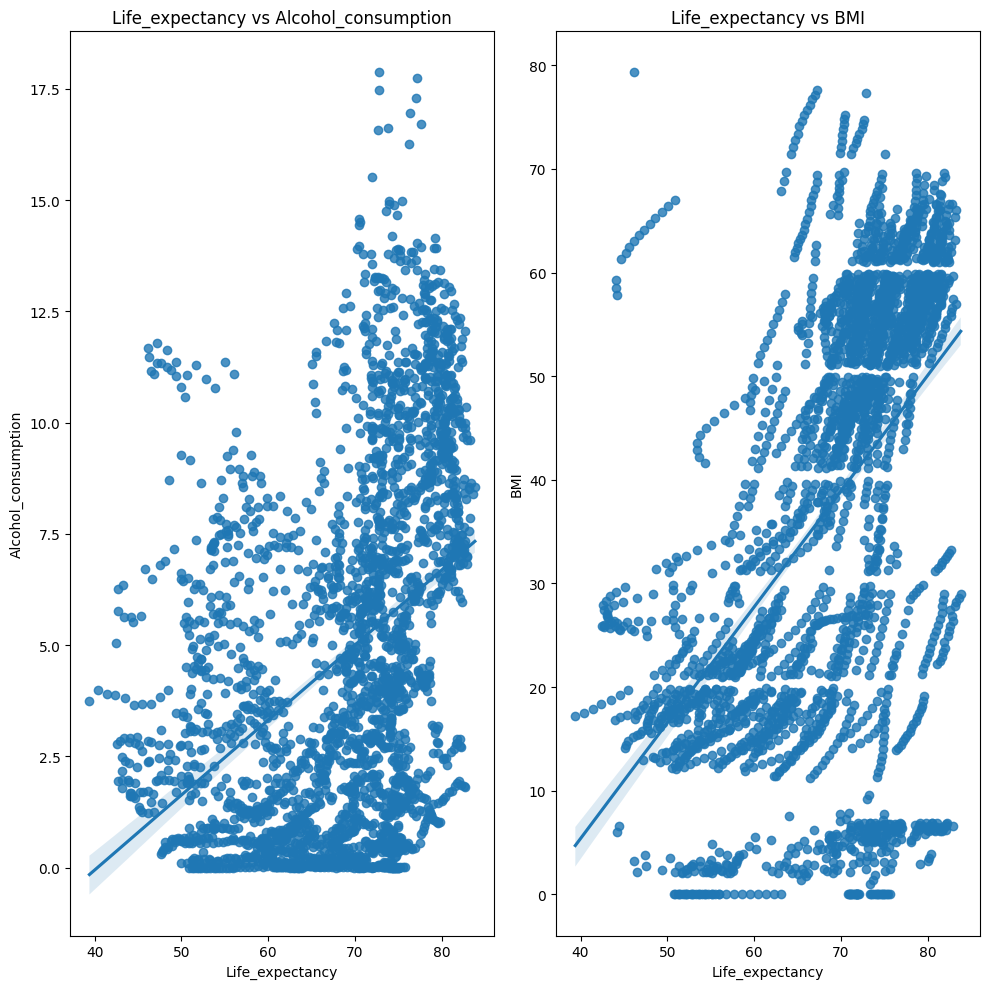

In [ ]:
figure, axis = plt.subplots(1,2,figsize=(10,10))

sns.regplot(x='Life_expectancy', y='Alcohol_consumption', data=lifestyle_df, ax=axis[0])
axis[0].set_title('Life_expectancy vs Alcohol_consumption')

sns.regplot(x='Life_expectancy', y='BMI', data=lifestyle_df, ax=axis[1])
axis[1].set_title('Life_expectancy vs BMI')

plt.tight_layout()
plt.show()

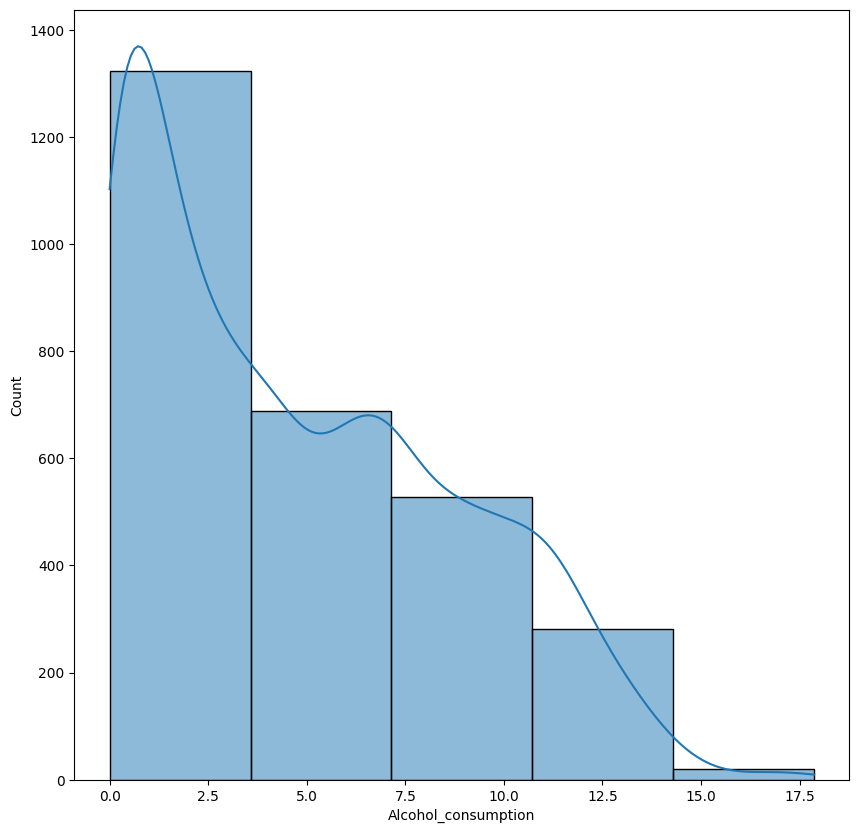

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data=df['Alcohol_consumption'],kde=True, bins=5)
plt.show()

In [ ]:
alcohol = []
for i in range(len(df['Alcohol_consumption'])):
  if df['Alcohol_consumption'][i] <= 3.75:
    alcohol.append([1])
  elif df['Alcohol_consumption'][i] <= 7.4:
    alcohol.append([2])
  elif df['Alcohol_consumption'][i] <= 11:
    alcohol.append([3])
  elif df['Alcohol_consumption'][i] <= 14.75:
    alcohol.append([4])
  else:
    alcohol.append([5])

In [ ]:
alcohol_df = pd.DataFrame(alcohol, columns=['Alcohol_consumption'])

In [ ]:
df = df.drop(['Alcohol_consumption'], axis=1)
df = df.join(alcohol_df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2842 entries, 0 to 2841
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2842 non-null   object 
 1   Region                           2842 non-null   object 
 2   Year                             2842 non-null   int64  
 3   Economy_status_Developed         2842 non-null   int64  
 4   Life_expectancy                  2842 non-null   float64
 5   Adult_mortality                  2842 non-null   float64
 6   Infant_deaths                    2842 non-null   float64
 7   percentage expenditure           2842 non-null   float64
 8   Hepatitis_B                      2842 non-null   int64  
 9   Measles                          2842 non-null   int64  
 10  BMI                              2842 non-null   float64
 11  Under_five_deaths                2842 non-null   float64
 12  Polio               

<Axes: >

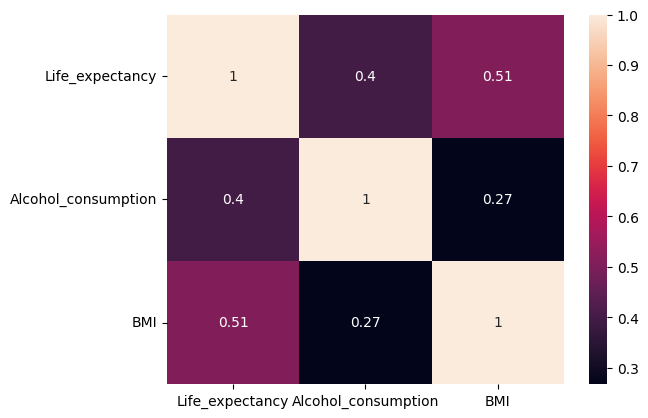

In [ ]:
sns.heatmap(lifestyle_df.corr(), annot=True)

## Health

In [ ]:
# 없애기
columns = ['Life_expectancy', 'Alcohol_consumption', 'BMI', 'Thinness_five_nine_years', 'Thinness_ten_nineteen_years', 'Diphtheria', 'Hepatitis_B', 'Polio', 'Income composition of resources', 'Incidents_HIV', 'Measles']
health_df = pd.DataFrame(df, columns=columns)
health_df.head()

,Life_expectancy,Alcohol_consumption,BMI,Thinness_five_nine_years,Thinness_ten_nineteen_years,Diphtheria,Hepatitis_B,Polio,Income composition of resources,Incidents_HIV,Measles
0,55.8,1,12.2,2.5,2.3,24,62,24.0,0.338,0.02,6532
1,56.3,1,12.6,2.4,2.1,33,63,35.0,0.340,0.02,8762
2,56.8,1,13.0,2.2,19.9,36,64,36.0,0.341,0.02,2486
3,57.3,1,13.4,19.9,19.7,41,65,41.0,0.373,0.02,798
4,57.8,1,13.8,19.7,19.5,50,67,5.0,0.381,0.02,466


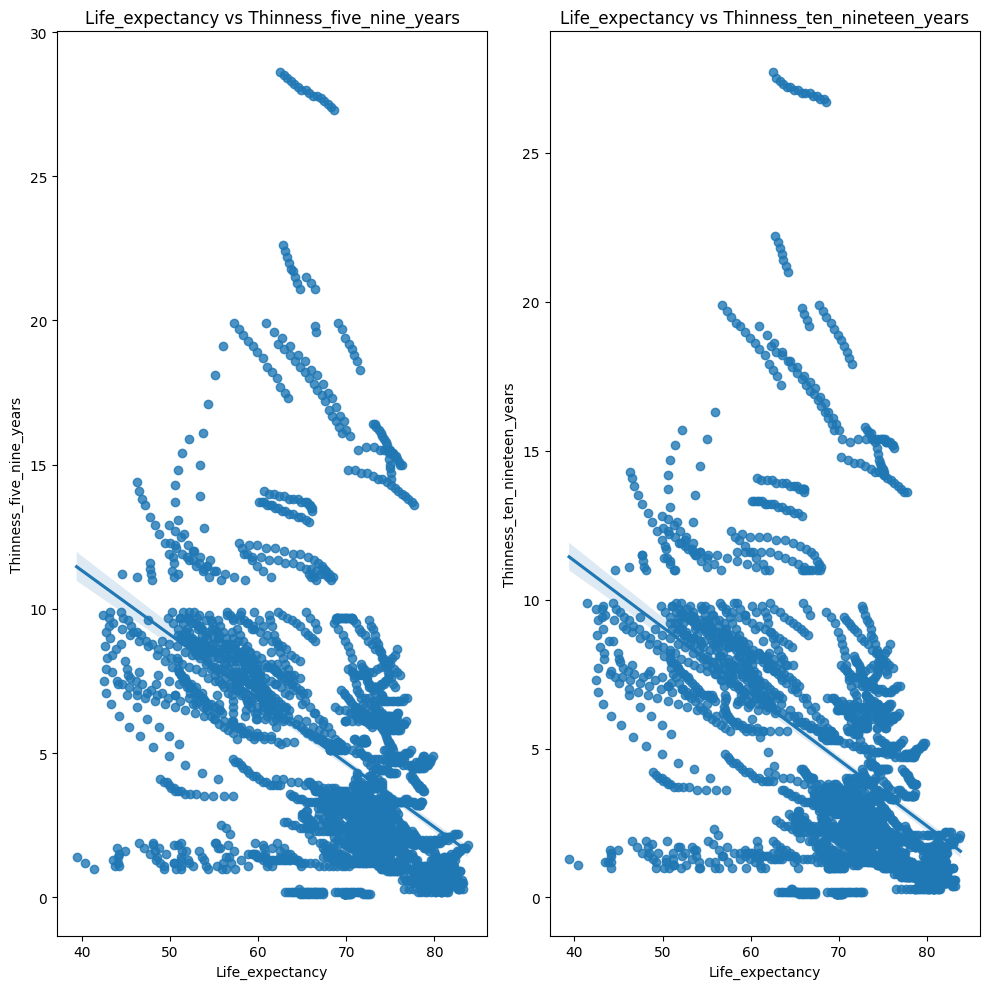

In [ ]:
figure, axis = plt.subplots(1, 2,figsize=(10,10))

sns.regplot(x='Life_expectancy', y='Thinness_five_nine_years', data=health_df, ax=axis[0])
axis[0].set_title('Life_expectancy vs Thinness_five_nine_years')

sns.regplot(x='Life_expectancy', y='Thinness_ten_nineteen_years', data=health_df, ax=axis[1])
axis[1].set_title('Life_expectancy vs Thinness_ten_nineteen_years')


plt.tight_layout()
plt.show()

In [ ]:
columns = ['Life_expectancy', 'Thinness_five_nine_years', 'Thinness_ten_nineteen_years']
healthcare_df = pd.DataFrame(df, columns=columns)

<Axes: >

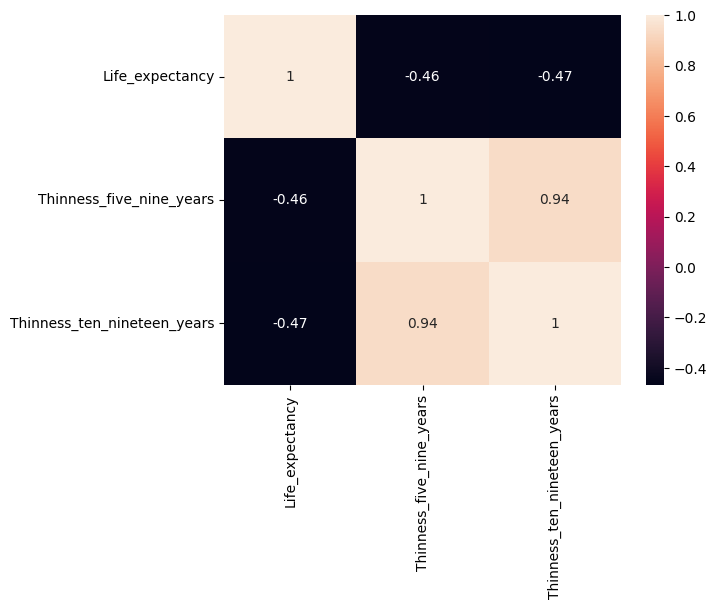

In [ ]:
sns.heatmap(healthcare_df.corr(), annot=True)

기대수명과 알코올, BMI, BMI지수가 낮은 마른체형유병률과의 상관계수가 0.4~0.5 사이로, 유의미한 결과가 나오지 않았다.

## Disease

In [ ]:
columns = ['Life_expectancy', 'Diphtheria', 'Hepatitis_B', 'Polio', 'Incidents_HIV', 'Measles']
disease_df = pd.DataFrame(df, columns=columns)
disease_df.head()

,Life_expectancy,Diphtheria,Hepatitis_B,Polio,Incidents_HIV,Measles
0,55.8,24,62,24.0,0.02,6532
1,56.3,33,63,35.0,0.02,8762
2,56.8,36,64,36.0,0.02,2486
3,57.3,41,65,41.0,0.02,798
4,57.8,50,67,5.0,0.02,466


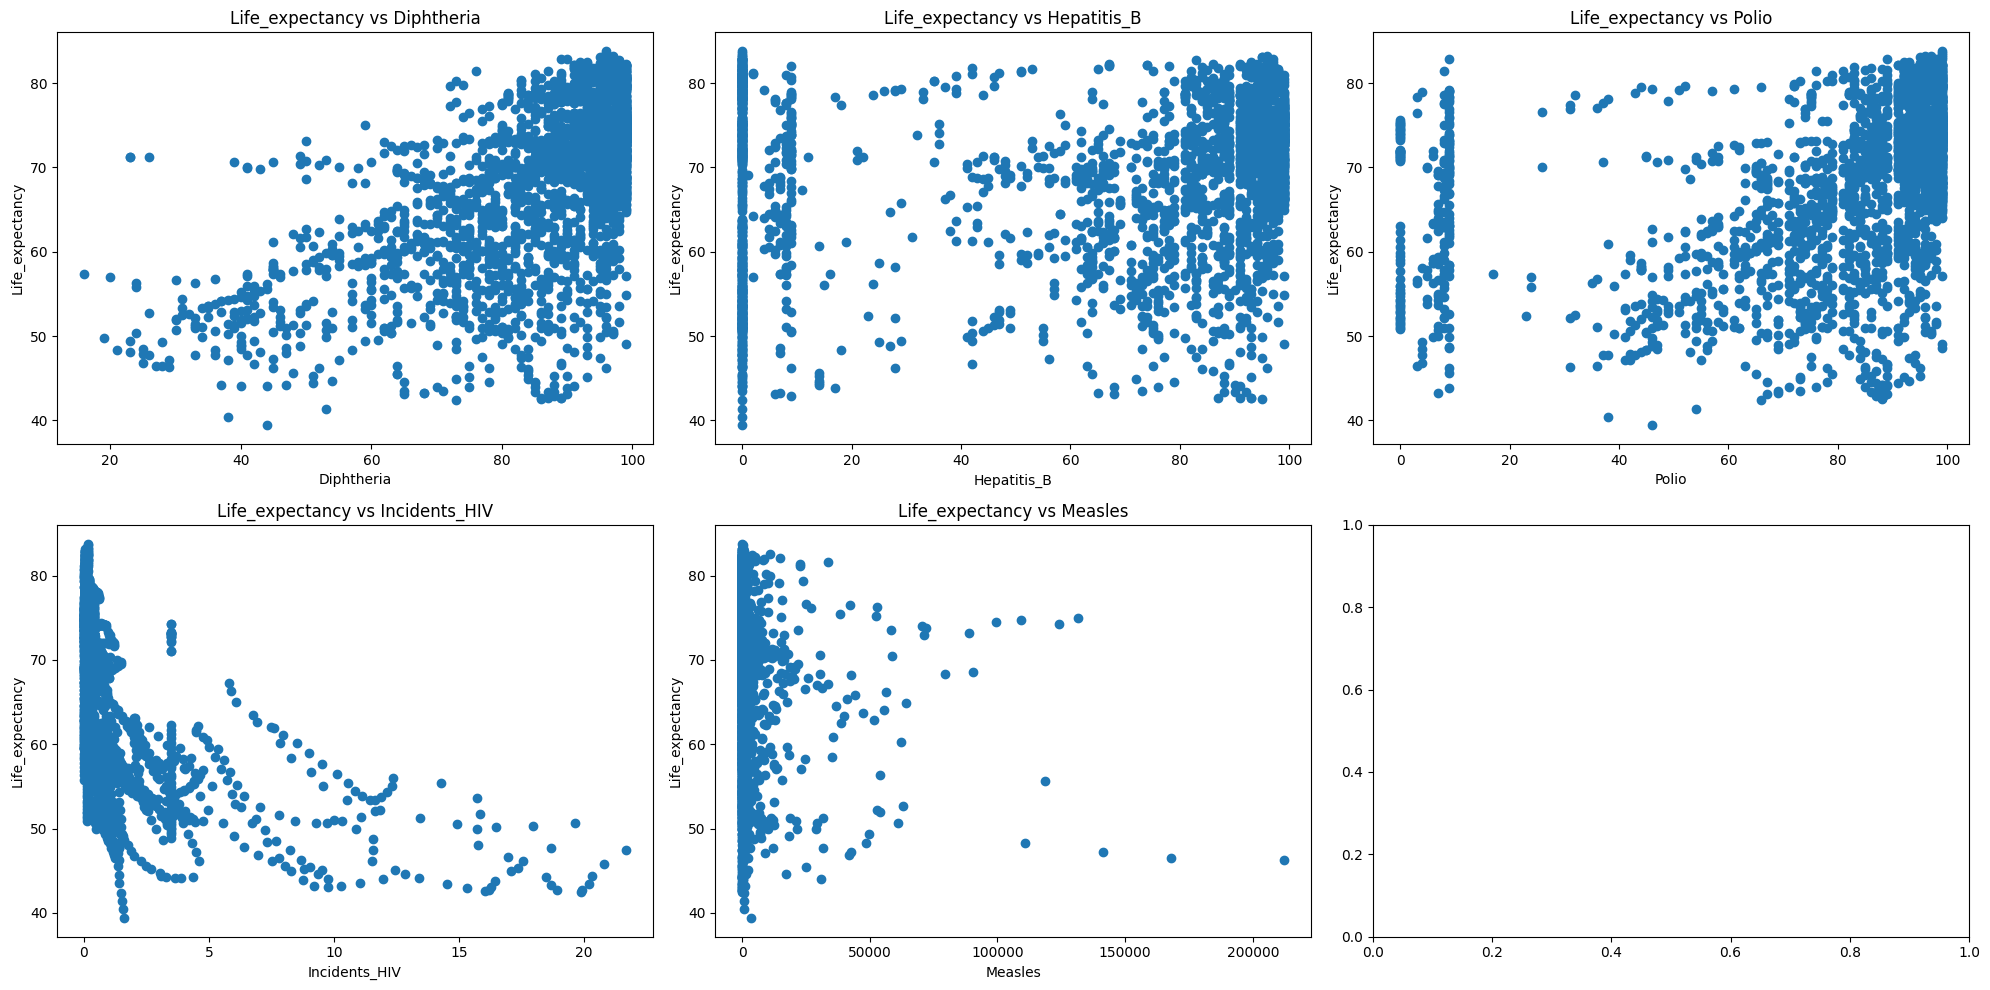

In [ ]:
figure, axis = plt.subplots(2,3,figsize=(20,10))

axis[0,0].scatter(disease_df['Diphtheria'], disease_df['Life_expectancy'])
axis[0,0].set_ylabel('Life_expectancy')
axis[0,0].set_xlabel('Diphtheria')
axis[0,0].set_title('Life_expectancy vs Diphtheria')

axis[0,1].scatter(disease_df['Hepatitis_B'], disease_df['Life_expectancy'])
axis[0,1].set_ylabel('Life_expectancy')
axis[0,1].set_xlabel('Hepatitis_B')
axis[0,1].set_title('Life_expectancy vs Hepatitis_B')

axis[0,2].scatter(disease_df['Polio'], disease_df['Life_expectancy'])
axis[0,2].set_ylabel('Life_expectancy')
axis[0,2].set_xlabel('Polio')
axis[0,2].set_title('Life_expectancy vs Polio')

axis[1,0].scatter(disease_df['Incidents_HIV'], disease_df['Life_expectancy'])
axis[1,0].set_ylabel('Life_expectancy')
axis[1,0].set_xlabel('Incidents_HIV')
axis[1,0].set_title('Life_expectancy vs Incidents_HIV')

axis[1,1].scatter(disease_df['Measles'], disease_df['Life_expectancy'])
axis[1,1].set_ylabel('Life_expectancy')
axis[1,1].set_xlabel('Measles')
axis[1,1].set_title('Life_expectancy vs Measles')

plt.tight_layout()
plt.show()

<Axes: >

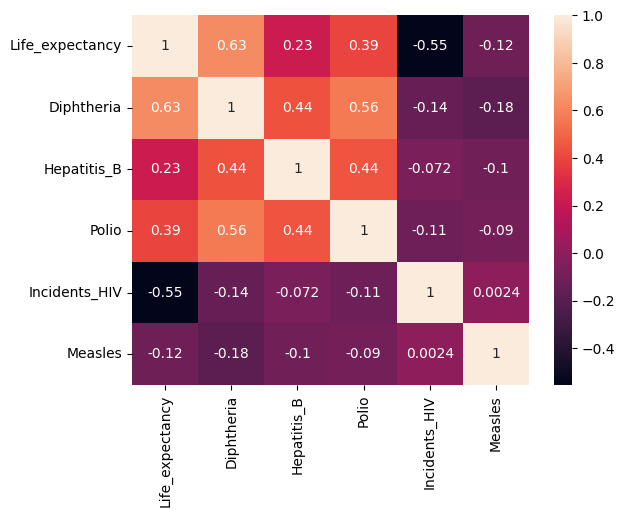

In [ ]:
sns.heatmap(disease_df.corr(), annot=True)

## Region

In [ ]:
columns = ['Life_expectancy', 'Population_mln', 'Economy_status_Developed', 'GDP_per_capita', 'Total expenditure', 'percentage expenditure','Income composition of resources', 'Schooling']
region_df = pd.DataFrame(df, columns=columns)
region_df.head()

,Life_expectancy,Population_mln,Economy_status_Developed,GDP_per_capita,Total expenditure,percentage expenditure,Income composition of resources,Schooling
0,55.8,20.78,0,148,8.20,10.424960,0.338,2.2
1,56.3,21.61,0,163,7.80,10.574728,0.340,2.2
2,56.8,22.60,0,320,7.76,16.887351,0.341,2.3
3,57.3,23.68,0,332,8.82,11.089053,0.373,2.4
4,57.8,24.73,0,323,8.79,15.296066,0.381,2.5


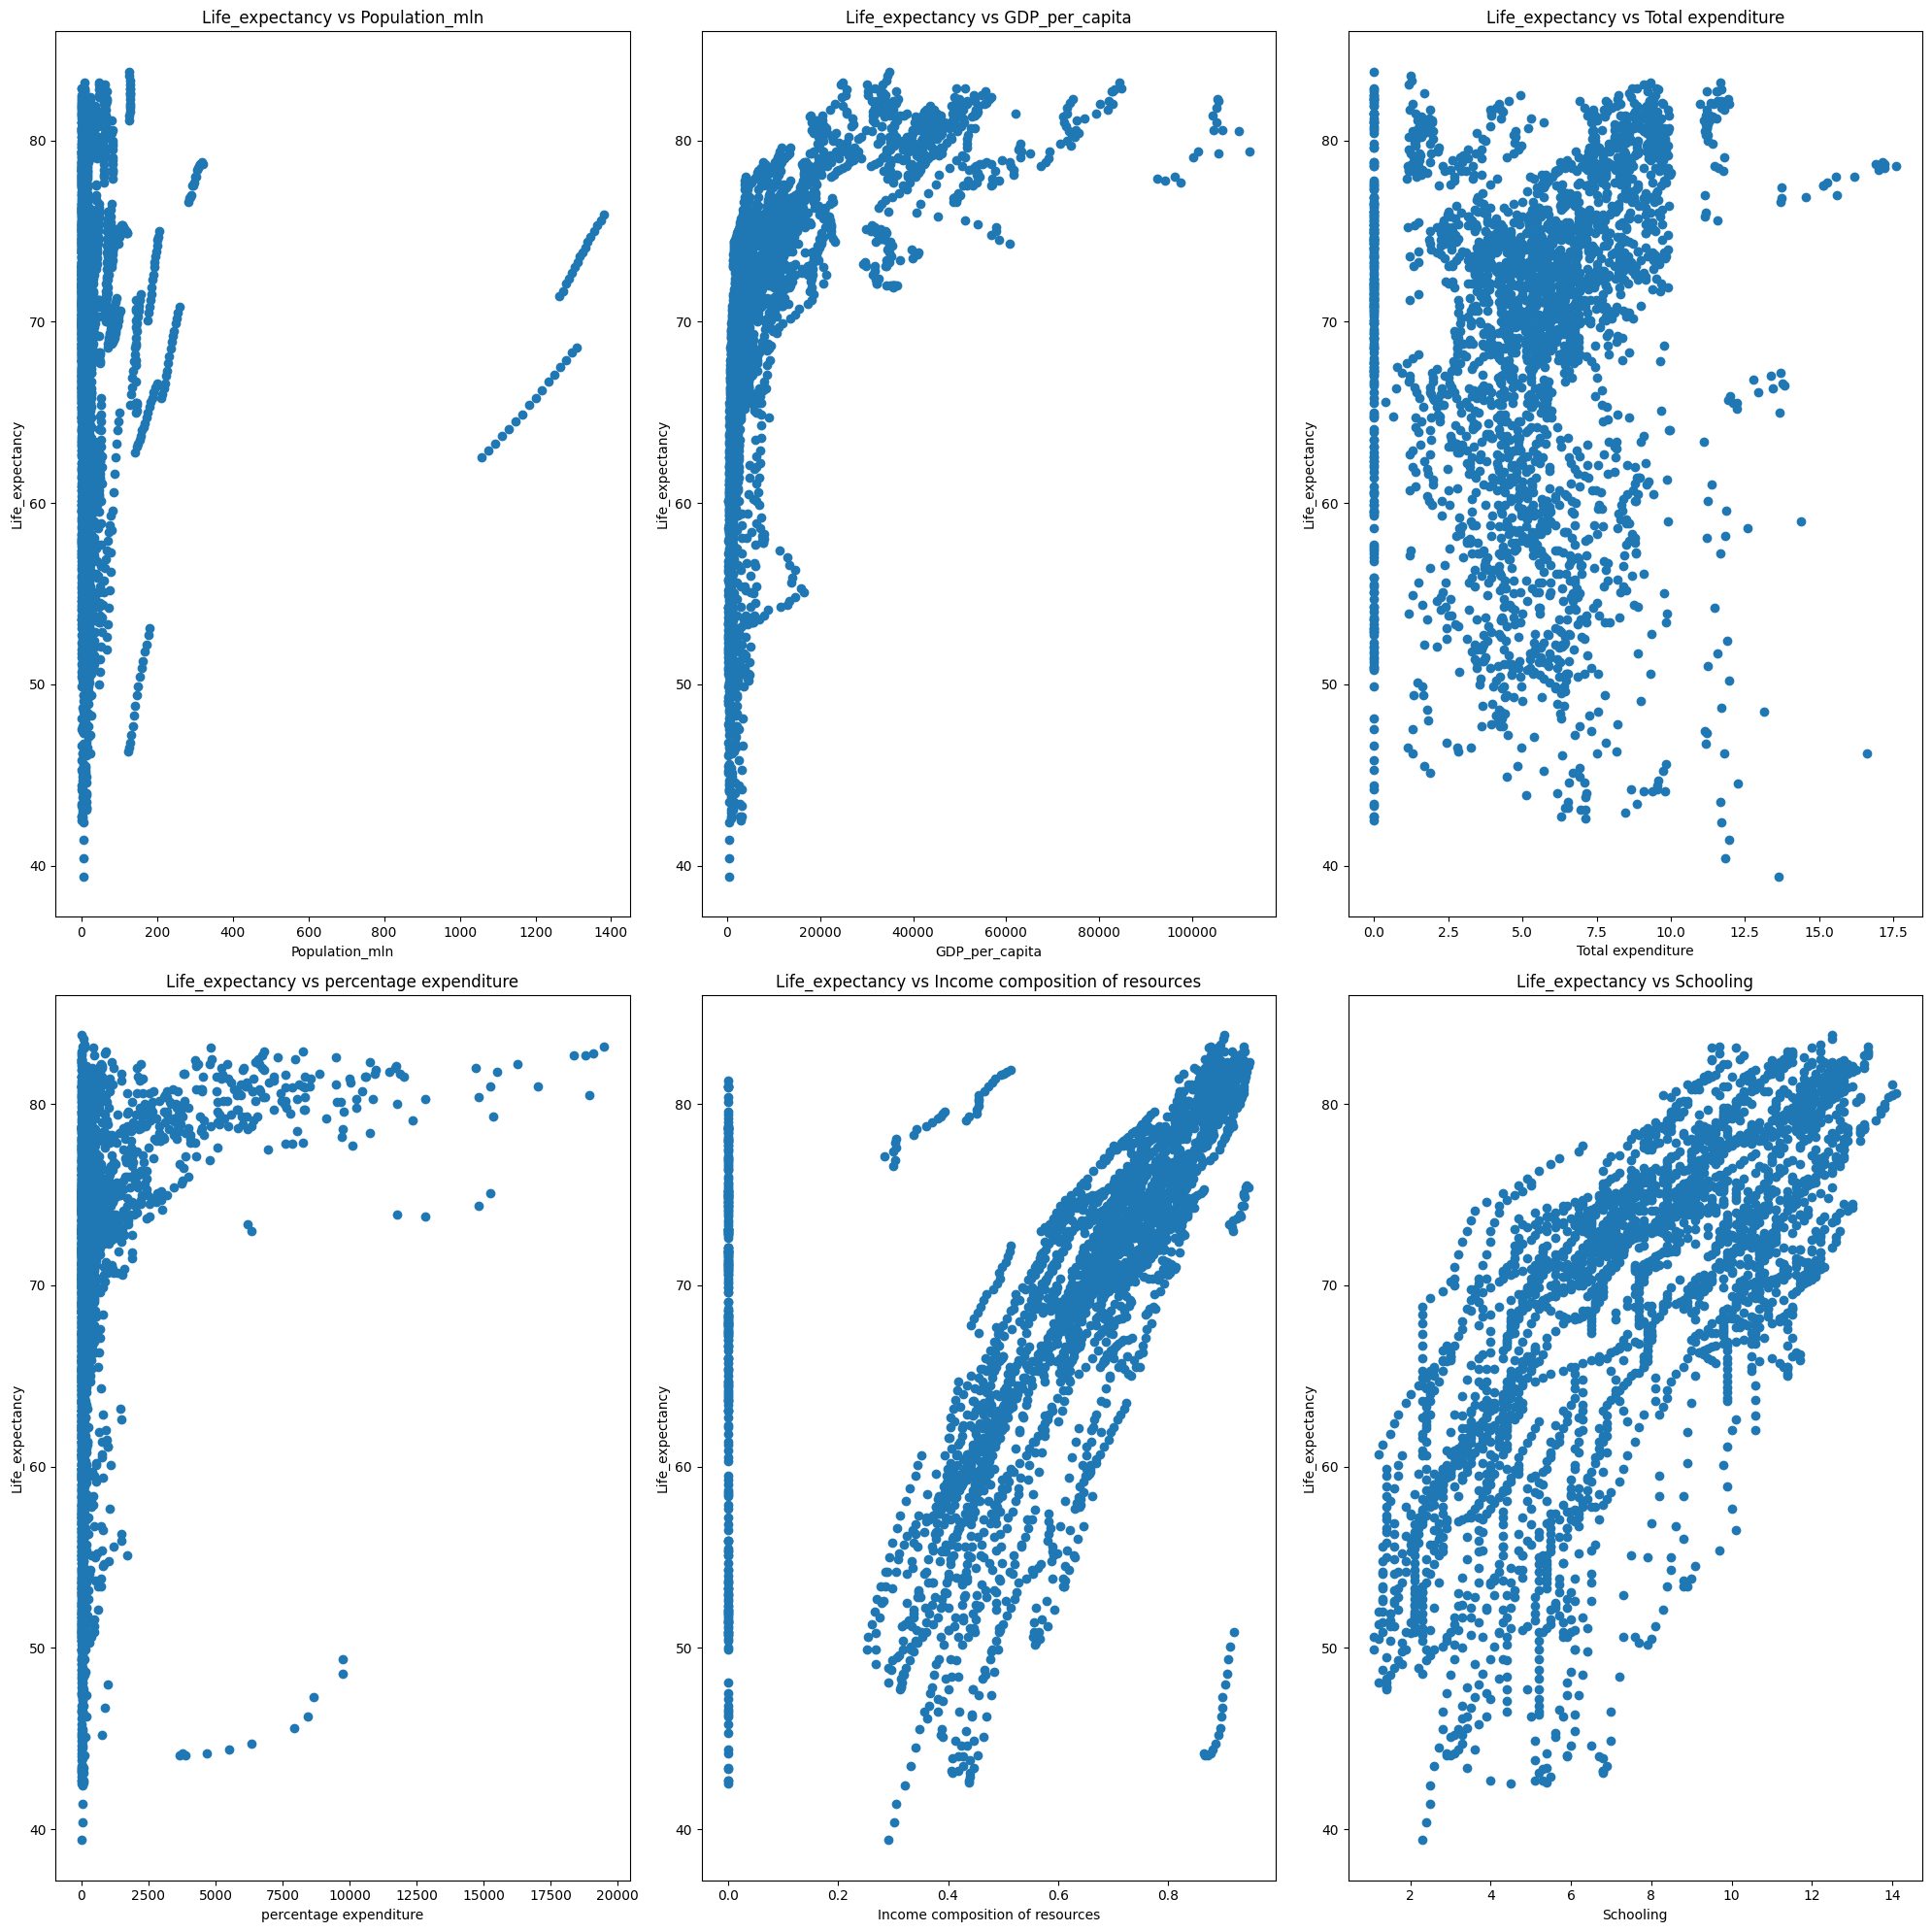

In [ ]:
figure, axis = plt.subplots(2,3,figsize=(20,20))

axis[0,0].scatter(df['Population_mln'], df['Life_expectancy'])
axis[0,0].set_ylabel('Life_expectancy')
axis[0,0].set_xlabel('Population_mln')
axis[0,0].set_title('Life_expectancy vs Population_mln')

axis[0,1].scatter(df['GDP_per_capita'], df['Life_expectancy'])
axis[0,1].set_ylabel('Life_expectancy')
axis[0,1].set_xlabel('GDP_per_capita')
axis[0,1].set_title('Life_expectancy vs GDP_per_capita')

axis[0,2].scatter(df['Total expenditure'], df['Life_expectancy'])
axis[0,2].set_ylabel('Life_expectancy')
axis[0,2].set_xlabel('Total expenditure')
axis[0,2].set_title('Life_expectancy vs Total expenditure')

axis[1,0].scatter(df['percentage expenditure'], df['Life_expectancy'])
axis[1,0].set_ylabel('Life_expectancy')
axis[1,0].set_xlabel('percentage expenditure')
axis[1,0].set_title('Life_expectancy vs percentage expenditure')

axis[1,1].scatter(df['Income composition of resources'], df['Life_expectancy'])
axis[1,1].set_ylabel('Life_expectancy')
axis[1,1].set_xlabel('Income composition of resources')
axis[1,1].set_title('Life_expectancy vs Income composition of resources')

axis[1,2].scatter(df['Schooling'], df['Life_expectancy'])
axis[1,2].set_ylabel('Life_expectancy')
axis[1,2].set_xlabel('Schooling')
axis[1,2].set_title('Life_expectancy vs Schooling')

plt.tight_layout()
plt.show()

<Axes: >

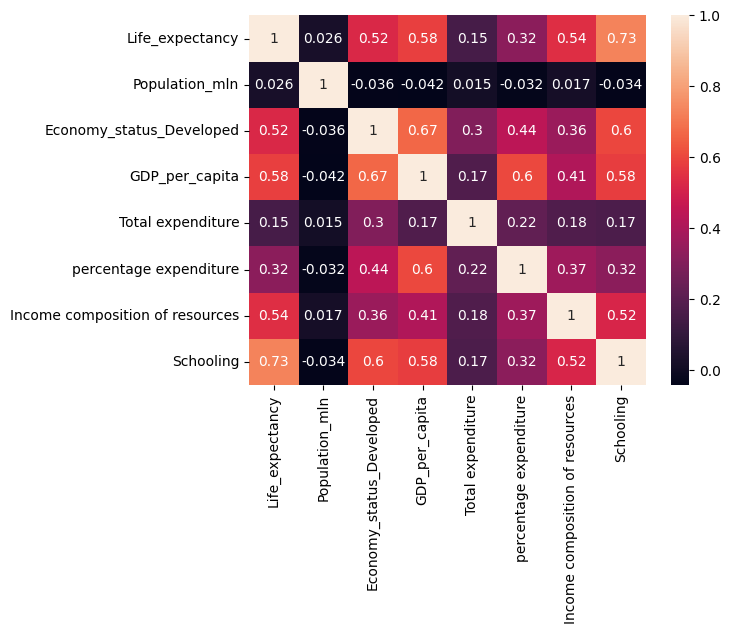

In [ ]:
sns.heatmap(region_df.corr(), annot=True)

## Age - Health

<Axes: >

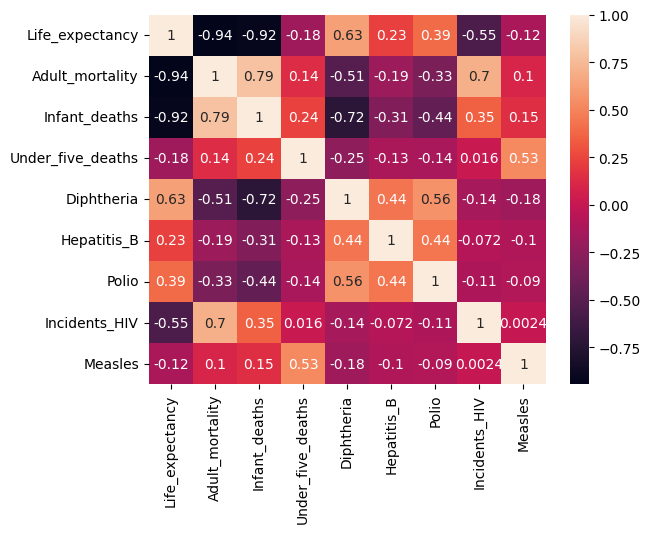

In [ ]:
age_health_df = pd.DataFrame(df, columns=['Life_expectancy', 'Adult_mortality', 'Infant_deaths', 'Under_five_deaths', 'Diphtheria', 'Hepatitis_B', 'Polio', 'Incidents_HIV', 'Measles'])
sns.heatmap(age_health_df.corr(), annot=True)

## Age - Region


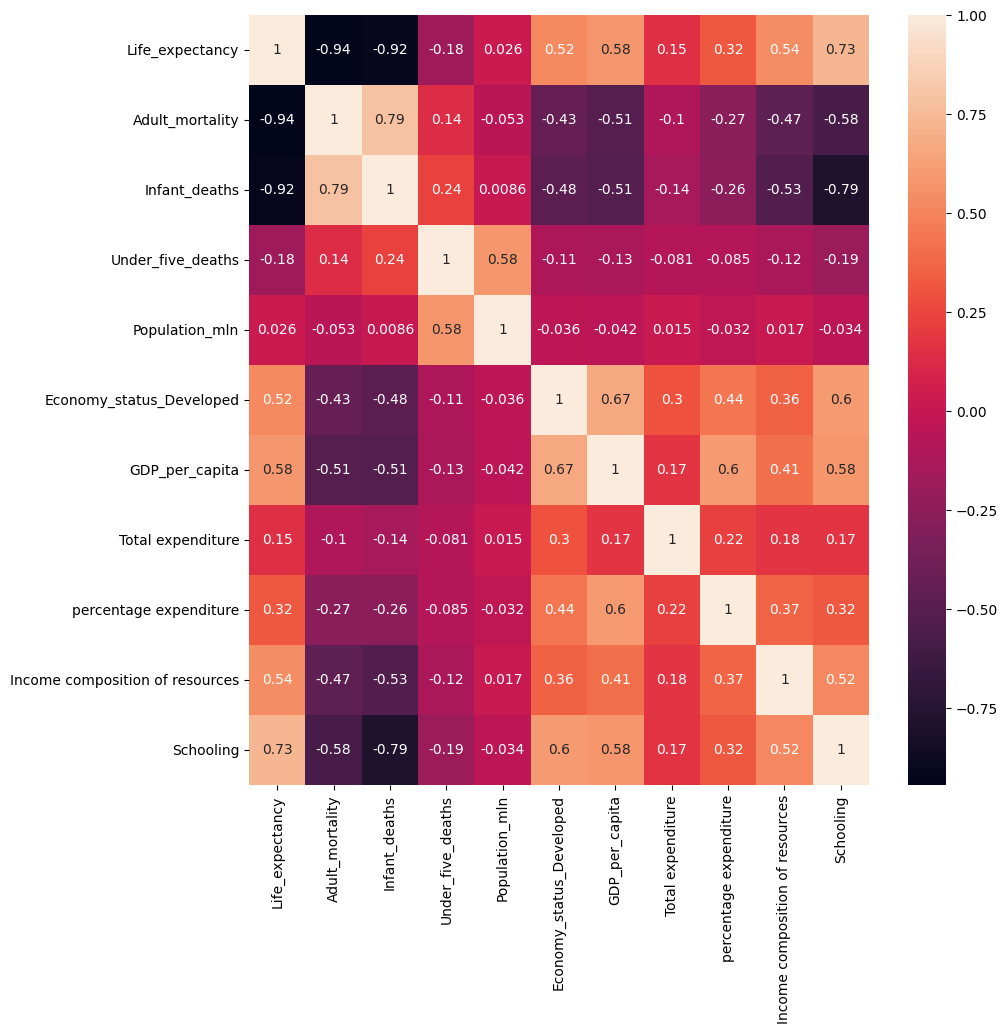

In [ ]:
age_region_df = pd.DataFrame(df, columns=['Life_expectancy', 'Adult_mortality', 'Infant_deaths', 'Under_five_deaths','Population_mln', 'Economy_status_Developed', 'GDP_per_capita', 'Total expenditure', 'percentage expenditure','Income composition of resources', 'Schooling'])
plt.figure(figsize=(10, 10))
sns.heatmap(age_region_df.corr(), annot=True)
plt.show()

전처리 시에 살리는 데이터: Economy_status_Developed, GDP_per_capita, Income composition of resources, Schooling

## Health - Region

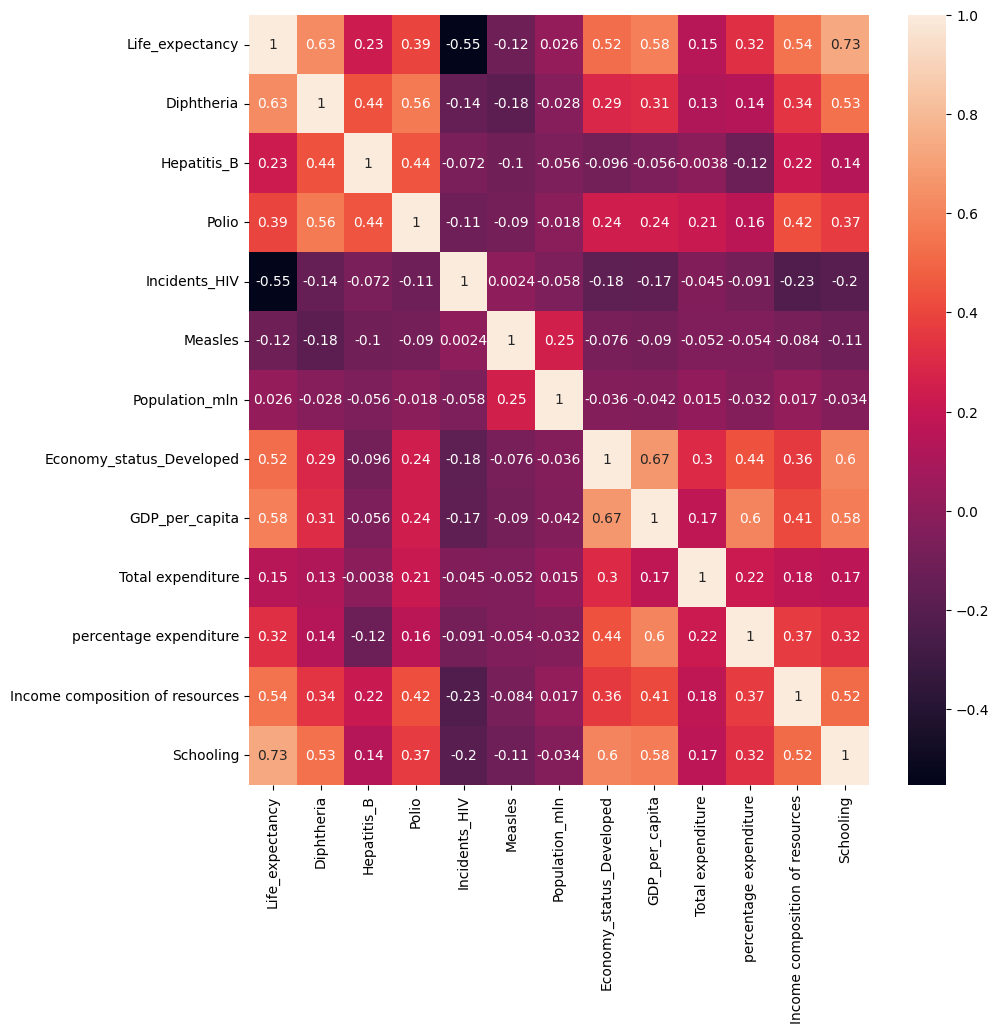

In [ ]:
health_region_df = pd.DataFrame(df, columns=['Life_expectancy', 'Diphtheria', 'Hepatitis_B', 'Polio', 'Incidents_HIV', 'Measles','Population_mln', 'Economy_status_Developed', 'GDP_per_capita', 'Total expenditure', 'percentage expenditure','Income composition of resources', 'Schooling'])
plt.figure(figsize=(10, 10))
sns.heatmap(health_region_df.corr(), annot=True)
plt.show()

## 3. 데이터 전처리

In [ ]:
transformed_df = pd.DataFrame(df, columns=['Adult_mortality', 'BMI', 'Diphtheria', 'Polio', 'Incidents_HIV', 'GDP_per_capita'])
transformed_df = transformed_df.join(df['Alcohol_consumption'])
transformed_df = transformed_df.join(df['Economy_status_Developed'].reset_index().drop(['index'],axis=1))
transformed_df.head()

,Adult_mortality,BMI,Diphtheria,Polio,Incidents_HIV,GDP_per_capita,Alcohol_consumption,Economy_status_Developed
0,310.8305,12.2,24,24.0,0.02,148,1,0
1,304.8580,12.6,33,35.0,0.02,163,1,0
2,298.8855,13.0,36,36.0,0.02,320,1,0
3,292.0365,13.4,41,41.0,0.02,332,1,0
4,285.1880,13.8,50,5.0,0.02,323,1,0


In [ ]:
life_exp = df['Life_expectancy']
life_exp.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2842 entries, 0 to 2841
Series name: Life_expectancy
Non-Null Count  Dtype  
--------------  -----  
2842 non-null   float64
dtypes: float64(1)
memory usage: 22.3 KB


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_df, life_exp, test_size=0.3, random_state=42)

랜덤 포레스트 특성 중요도 확인 시에 높은 특성 중요도 특성 값: Adult_mortality, GDP_per_capita, Measles, Diphtheria, Polio, Hepatitis_B, Population_mln, BMI, Incidents_HIV, percentage expenditure

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate, GridSearchCV

train_score = []
test_score = []
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = XGBRegressor(tree_method='hist', random_state=42)
gs = GridSearchCV(xgb, params)

gs.fit(X_train, y_train)
print(gs.score(X_train, y_train), gs.score(X_test, y_test))

scores = cross_validate(xgb, X_train, y_train, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9980308023235284 0.9851333598439693
0.9997476714498964 0.9874116659399792


In [ ]:
gs.best_params_

{'colsample_bytree': 1.0,
 'gamma': 0.5,
 'max_depth': 5,
 'min_child_weight': 1,
 'subsample': 0.6}

In [ ]:
xgb = XGBRegressor(tree_methods='hist', colsample_bytree = 1.0, gamma = 0.5, max_depth=5, min_child_weight=1, subsample=1)
xgb.fit(X_train, y_train)
print(xgb.score(X_train, y_train), xgb.score(X_test, y_test))

0.9946887160506426 0.984958569099342


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:32:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "tree_methods" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(tree_methods='hist', colsample_bytree = 1.0, gamma = 0.5, max_depth=5).fit(X_train, y_train)

# 파일명
filename = 'xgb_model.model'

# 모델 저장
xgb_model.save_model(filename)

# 모델 불러오기
new_xgb_model = xgb.XGBRegressor() # 모델 초기화
new_xgb_model.load_model(filename) # 모델 불러오기

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:32:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "tree_methods" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:32:55] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [ ]:
# 모델 불러오는 코드
model = xgb.Booster()
model.load_model('/content/xgb_model.model')

# 사용자 입력 받는 함수
def get_user_input():
  user_input = {}

  user_input['나라'] = input('나라를 입력하세요: ')
  user_input['성별'] = input('성별을 입력하세요.(남자/여자): ')
  user_input['키'] = float(input('키(cm)를 입력하세요: '))
  user_input['체중'] = float(input('체중(kg) 을 입력하세요: '))
  user_input['흡연 여부'] = input('흡연 여부를 입력하세요(Y/N): ')
  user_input['음주량'] = float(input('1달 기준 음주량을 입력하세요 1~5 수준으로 입력해주세요.(1병 이하: 1, 1병~2병: 2, 2병~3병: 3, 3병~4병: 4, 5병 이상: 5): '))
  user_input['수면량'] = input('평균적으로 7시간 이상 주무시나요?(Y/N): ')

  # 사용자가 '한국' 또는 '대한민국'을 입력했을 때 추가적인 정보를 제공
  if user_input['나라'] in ['한국', '대한민국']:
      user_input['Incidents_HIV'] = 0.01
      user_input['Alcohol_consumption'] = user_input['음주량']
      user_input['Polio'] = 97.4
      user_input['Diphtheria'] = 95.9
      user_input['Economy_status'] = 1
      if['성별'] == '남자':
        user_input['Adult_mortality'] = 57.02
      else:
        user_input['Adult_mortality'] = 22.07
      user_input['BMI'] = user_input['체중'] / (user_input['키']*0.01)**2
  user_df = pd.DataFrame([user_input])


  return user_df

# 사용자 입력을 모델에 넣어 예측값을 계산하고 출력하는 코드
def predict_lifespan(model, user_input):
  user_input_processed = xgb.DMatrix(user_input.drop(['나라', '성별', '키', '체중', '흡연 여부', '음주량', '수면량'], axis=1))

  predicted_lifespan = model.predict(user_input_processed)
  print('예상 수명: ', predicted_lifespan[0])
  return predicted_lifespan

# 사용자 입력 받기
user_input = get_user_input()

# 예측값 계산 및 출력
predicted_lifespan = predict_lifespan(model, user_input)

# 수면량에 따른 기대수명 조정
if user_input['수면량'][0] == 'N' or user_input['수면량'][0] == 'n':
  if user_input['성별'][0] == '남자':
      predicted_lifespan -= 4.7
  else:
      predicted_lifespan -= 2.5

# 흡연 여부에 따른 기대수명 조정
if user_input['흡연 여부'][0] == 'Y' or user_input['흡연 여부'][0] == 'y':
  if user_input['성별'][0] == '남자':
      predicted_lifespan -= 3.73
  else:
      predicted_lifespan -= 1

print('조정된 예상 수명: ', predicted_lifespan[0])


나라를 입력하세요: 한국
성별을 입력하세요.(남자/여자): 여자
키(cm)를 입력하세요: 162
체중(kg) 을 입력하세요: 62
흡연 여부를 입력하세요(Y/N): n
1달 기준 음주량을 입력하세요 1~5 수준으로 입력해주세요.(1병 이하: 1, 1병~2병: 2, 2병~3병: 3, 3병~4병: 4, 5병 이상: 5): 1
평균적으로 7시간 이상 주무시나요?(Y/N): n
예상 수명:  78.32118
조정된 예상 수명:  75.82118
